In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
import pandas as pd
import numpy as np


file_path = "CleanDataFinal.xlsx" 
sheet_name = "Two Main Variables" 
df = pd.read_excel(file_path, sheet_name=sheet_name)

df = df.T
df.columns = df.iloc[0]
df = df.iloc[2:]
df.index.name = "Year"

df.columns = ["Average Gross Income (PHP)", "Housing Price Index (2010 = 100)"]

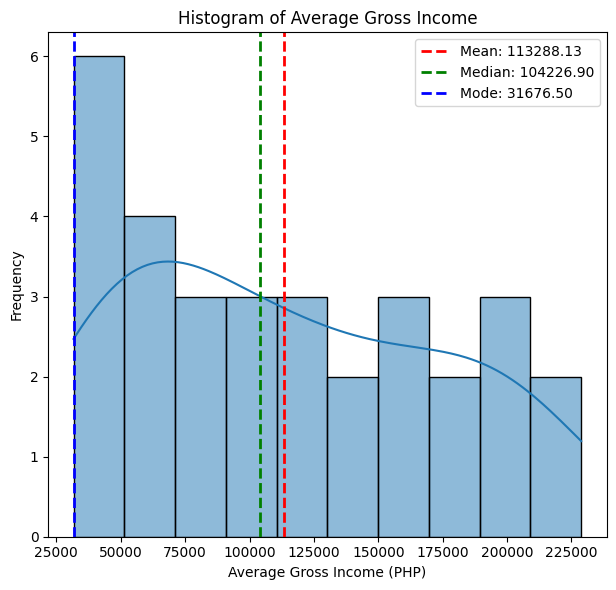

In [3]:
mean_income = df['Average Gross Income (PHP)'].mean(); 
median_income = df['Average Gross Income (PHP)'].median(); 
mode_income = df['Average Gross Income (PHP)'].mode().iloc[0]

mean_housing = df['Housing Price Index (2010 = 100)'].mean(); 
median_housing = df['Housing Price Index (2010 = 100)'].median(); 
mode_housing = df['Housing Price Index (2010 = 100)'].mode().iloc[0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Average Gross Income (PHP)', bins=10, kde=True)
plt.axvline(mean_income, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_income:.2f}")
plt.axvline(median_income, color='g', linestyle='dashed', linewidth=2, label=f"Median: {median_income:.2f}")
plt.axvline(mode_income, color='b', linestyle='dashed', linewidth=2, label=f"Mode: {mode_income:.2f}")
plt.title("Histogram of Average Gross Income")
plt.xlabel("Average Gross Income (PHP)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

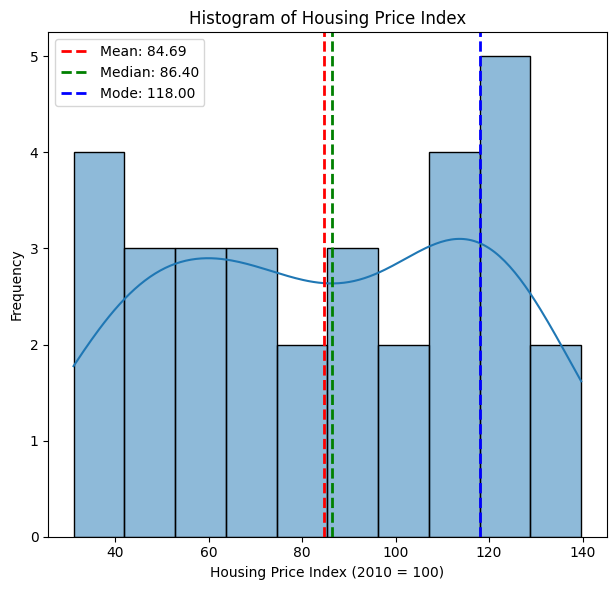

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Housing Price Index (2010 = 100)', bins=10, kde=True)
plt.axvline(mean_housing, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_housing:.2f}")
plt.axvline(median_housing, color='g', linestyle='dashed', linewidth=2, label=f"Median: {median_housing:.2f}")
plt.axvline(mode_housing, color='b', linestyle='dashed', linewidth=2, label=f"Mode: {mode_housing:.2f}")
plt.title("Histogram of Housing Price Index")
plt.xlabel("Housing Price Index (2010 = 100)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show


[1] It is noted that the histograms can best represent the mean, median and mode of the given data set. The formulas for such are done with a built in function. 

[2] The line that is drawn is based on the Kernel Density Estimatinon. This is function is a built in function in seaborn. It basically takes an approx. of each histogram bar and draws relative curves. More about this function can be read here: https://en.wikipedia.org/wiki/Kernel_density_estimation, https://seaborn.pydata.org/generated/seaborn.kdeplot.html 

[2] Average Gross Income (PHP) has a right skew, meaning that there is a higher frequency of points to the left of the median. 

[3] Housing Price Index appears to have a bimodal skew, however, it is more accurate to say that it has a left skew. 

[4] HPI trends suggest that there is a tendency for housing prices to be relatively lower, with more people purchasing homes or properties at prices below the median.

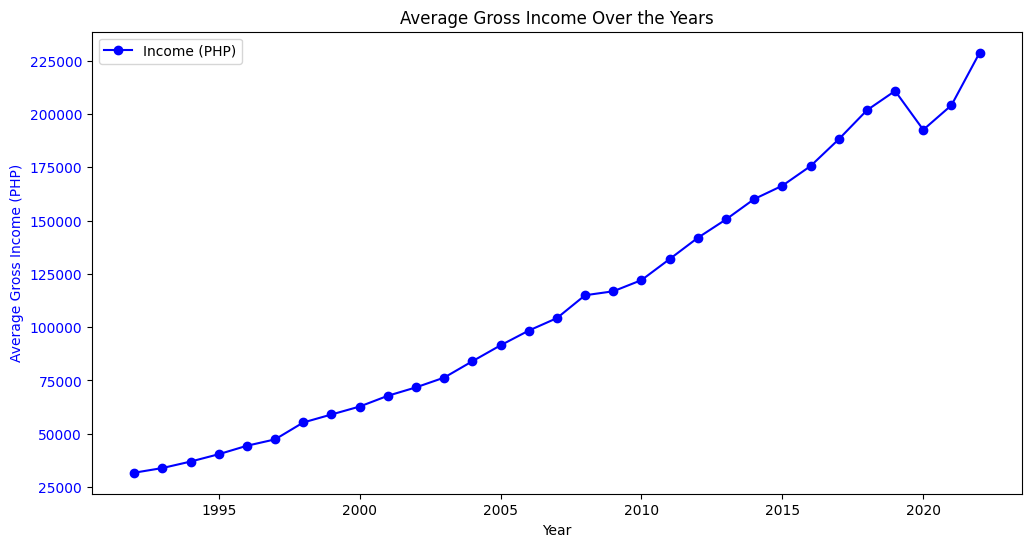

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df.index, df['Average Gross Income (PHP)'], color='blue', marker='o', label='Income (PHP)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Gross Income (PHP)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.title("Average Gross Income Over the Years")
ax1.legend(loc='upper left')
plt.show()

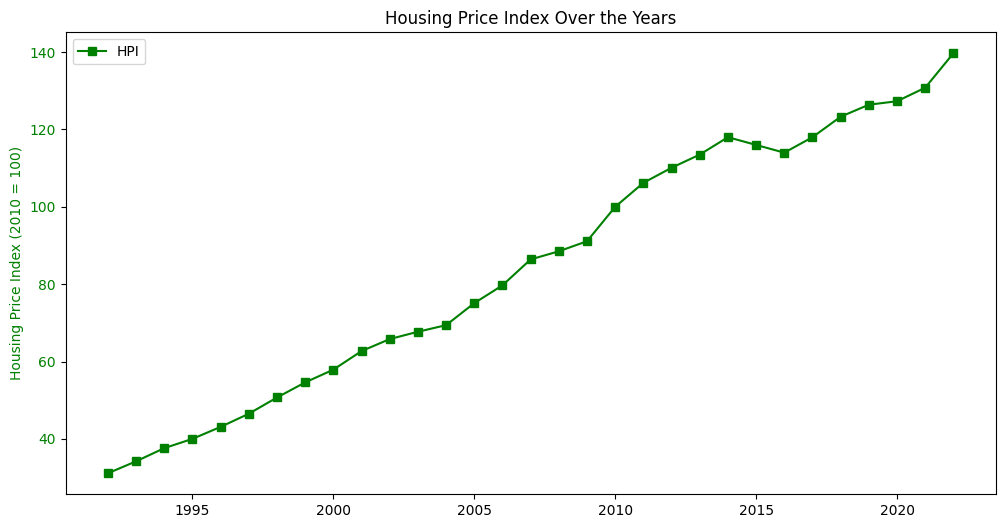

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['Housing Price Index (2010 = 100)'], color='green', marker='s', label='HPI')
ax1.set_ylabel("Housing Price Index (2010 = 100)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

plt.title("Housing Price Index Over the Years")
ax1.legend(loc='upper left')

plt.show()

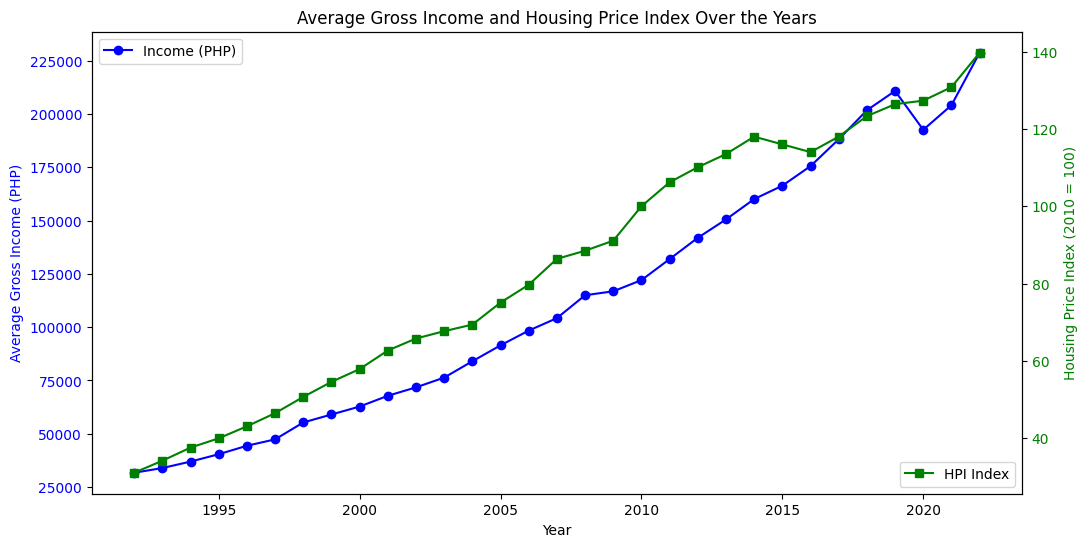

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['Average Gross Income (PHP)'], color='blue', marker='o', label='Income (PHP)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Gross Income (PHP)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx() 
ax2.plot(df.index, df['Housing Price Index (2010 = 100)'], color='green', marker='s', label='HPI')
ax2.set_ylabel("Housing Price Index (2010 = 100)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.title("Average Gross Income and Housing Price Index Over the Years")

plt.show()


In [14]:
range_income = round(df['Average Gross Income (PHP)'].max() - df['Average Gross Income (PHP)'].min(), 2)
std_dev_income = round(df['Average Gross Income (PHP)'].std(), 2) 
variance_income = round(df['Average Gross Income (PHP)'].var(), 2)

range_hpi = round(df['Housing Price Index (2010 = 100)'].max() - df['Housing Price Index (2010 = 100)'].min(), 2)
std_dev_hpi = round(df['Housing Price Index (2010 = 100)'].std(), 2)
variance_hpi = round(df['Housing Price Index (2010 = 100)'].var(), 2)

print(f"Average Gross Income (PHP):\nRange: {range_income}\nStandard Deviation: {std_dev_income}\nVariance: {variance_income}\n")
print(f"Housing Price Index (2010 = 100):\nRange: {range_hpi}\nStandard Deviation: {std_dev_hpi}\nVariance: {variance_hpi}")

Average Gross Income (PHP):
Range: 197103.8
Standard Deviation: 60903.08
Variance: 3709184981.08

Housing Price Index (2010 = 100):
Range: 108.6
Standard Deviation: 33.45
Variance: 1119.01


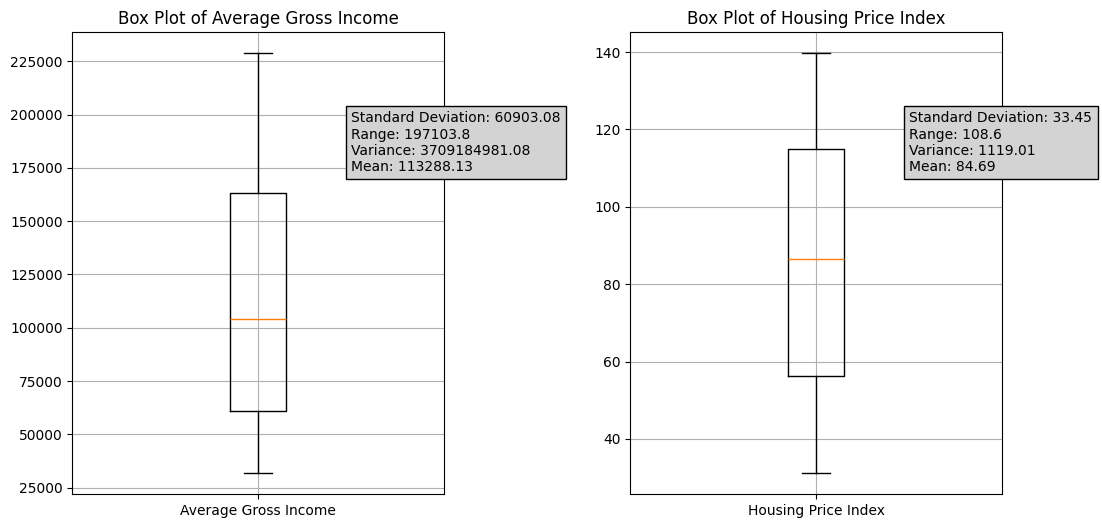

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.5)

ax[0].boxplot(df['Average Gross Income (PHP)'], labels=['Average Gross Income'])
ax[0].set_title("Box Plot of Average Gross Income")
ax[0].grid(True)

annotations = [
    f"Standard Deviation: {std_dev_income}",
    f"Range: {range_income}",
    f"Variance: {variance_income}",
    f"Mean: {mean_income:.2f}" 
]
ax[0].text(0.75, 0.7, '\n'.join(annotations), transform=ax[0].transAxes, bbox=dict(facecolor='lightgray'))

ax[1].boxplot(df['Housing Price Index (2010 = 100)'],  labels=['Housing Price Index'])
ax[1].set_title("Box Plot of Housing Price Index")
ax[1].grid(True)

annotations = [
    f"Standard Deviation: {std_dev_hpi}",
    f"Range: {range_hpi}",
    f"Variance: {variance_hpi}",
    f"Mean: {mean_housing:.2f}"
]
ax[1].text(0.75, 0.7, '\n'.join(annotations), transform=ax[1].transAxes, bbox=dict(facecolor='lightgray'))

plt.show()
